In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import time
 
import matplotlib
print(f'matplotlib version : {matplotlib.__version__}')
print('We need new version(>3.4.0) of matplotlib for showing numbers on the top of the bar plot')
if float(matplotlib.__version__.rsplit('.',1)[0]) < 3.4:
    %pip install matplotlib --upgrade
    print('If matplotlib has updated, please restart your kernel.')

matplotlib version : 3.5.0
We need new version(>3.4.0) of matplotlib for showing numbers on the top of the bar plot


In [2]:
(X, y) , (*_) = tf.keras.datasets.fashion_mnist.load_data()
X = X / 255.0

Shape of Dataset : (60000, 28, 28)


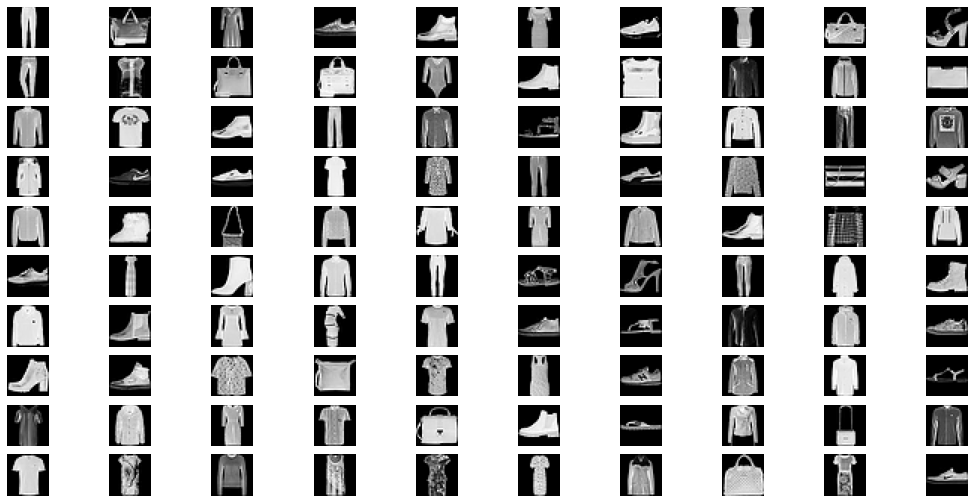

In [3]:
print(f"Shape of Dataset : {X.shape}")
fig, axes = plt.subplots(10,10, figsize=(18,9))
for ax in (axes.flat):
    idx = np.random.randint(X.shape[0])
    ax.imshow((X[idx]), cmap='gray')
    ax.axis('off')
plt.show()

In [4]:
W = np.random.uniform(0,1,(15,15,784))
W_before_learn = W.copy()

((15, 15, 784), <matplotlib.image.AxesImage at 0x7fa2d5dc95e0>)

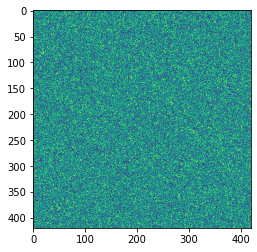

In [5]:
W.shape, plt.imshow(W.reshape(420,420))

In [6]:
def plot_clustring(W, ax):
    img_res = np.concatenate(
        np.vsplit(
            np.vstack(
                W.reshape(225, 28, 28)
            ), 
        15), 
    axis=1)
    
    ax.imshow(img_res)
    ax.axis('off')

In [7]:
def SOM(D, W, alpha, iteration):
    for itr in range(iteration):
        fig, axes = plt.subplots(1,4, figsize=(18,18))
        start_time = time.time()
        for idx, d in enumerate(D):
            d = d.ravel()
            dis = np.sum(((W.reshape(225,784) - d) ** 2), axis=1)
            i_u = np.argmin(dis)
            row , col = divmod(i_u, 15)
            for r, c in itertools.product([-1,0,1], repeat=2):
                try :
                    W[row+r, col+c] = (1-alpha)*W[row+r, col+c] + (alpha*d)
                except IndexError:
                    continue
            if idx % 250 == 0:
                plot_clustring(W, axes[idx//250])
        plt.show()
        alpha = 0.5 * alpha
        print(f'Epoch : {itr+1}/{iteration} , Time : {time.time()-start_time:.3f} s')
    return W

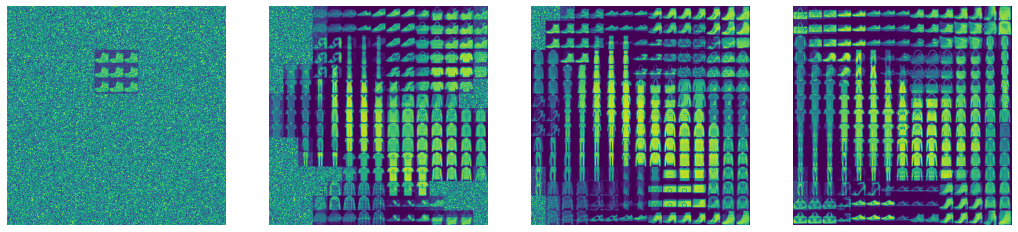

Epoch : 1/4 , Time : 1.052 s


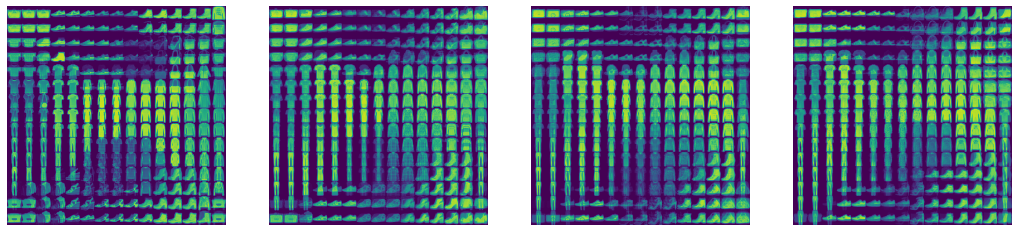

Epoch : 2/4 , Time : 1.318 s


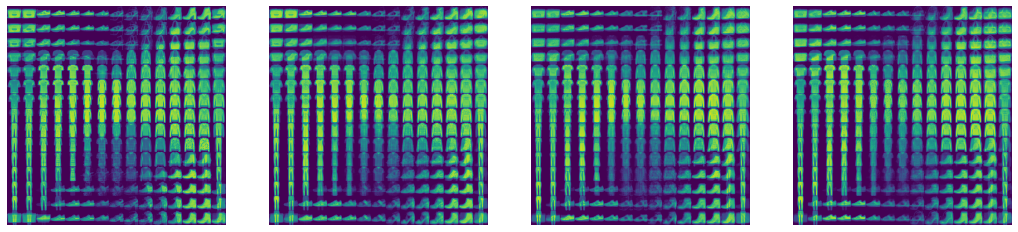

Epoch : 3/4 , Time : 1.030 s


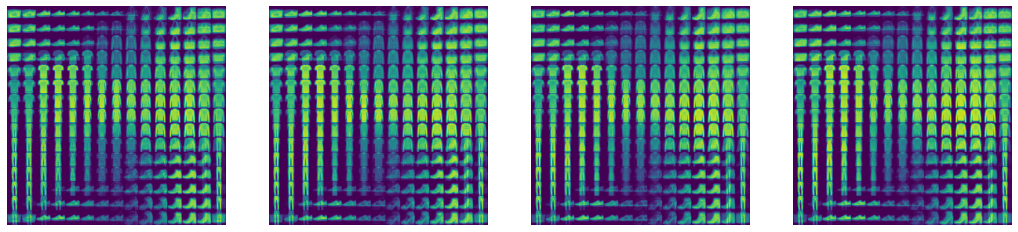

Epoch : 4/4 , Time : 1.338 s
CPU times: user 4.6 s, sys: 159 ms, total: 4.76 s
Wall time: 5.4 s


In [8]:
%%time
W = SOM(X[:1000], W, 0.6, 4)